In [30]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

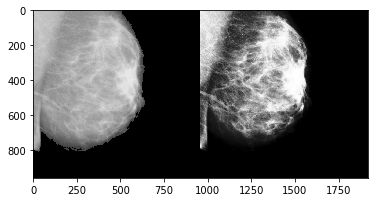

In [27]:
img = cv2.imread('imagens_da_mama/mdb280.jpg', 0)

equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
plt.imshow(res, cmap = "gray")

In [32]:
# Setar diretóro de trabalho
file = "C:/Users/sanin/Documents/MIAS-JPEG/imagens_etapa_1/"
os.chdir(file)
imagens = os.listdir()

['mdb001.jpg',
 'mdb002.jpg',
 'mdb003.jpg',
 'mdb004.jpg',
 'mdb005.jpg',
 'mdb006.jpg',
 'mdb007.jpg',
 'mdb008.jpg',
 'mdb009.jpg',
 'mdb010.jpg',
 'mdb011.jpg',
 'mdb012.jpg',
 'mdb013.jpg',
 'mdb014.jpg',
 'mdb015.jpg',
 'mdb016.jpg',
 'mdb017.jpg',
 'mdb018.jpg',
 'mdb019.jpg',
 'mdb020.jpg',
 'mdb021.jpg',
 'mdb022.jpg',
 'mdb023.jpg',
 'mdb024.jpg',
 'mdb025.jpg',
 'mdb026.jpg',
 'mdb027.jpg',
 'mdb028.jpg',
 'mdb029.jpg',
 'mdb030.jpg',
 'mdb031.jpg',
 'mdb032.jpg',
 'mdb033.jpg',
 'mdb034.jpg',
 'mdb035.jpg',
 'mdb036.jpg',
 'mdb037.jpg',
 'mdb038.jpg',
 'mdb039.jpg',
 'mdb040.jpg',
 'mdb041.jpg',
 'mdb042.jpg',
 'mdb043.jpg',
 'mdb044.jpg',
 'mdb045.jpg',
 'mdb046.jpg',
 'mdb047.jpg',
 'mdb048.jpg',
 'mdb049.jpg',
 'mdb050.jpg',
 'mdb051.jpg',
 'mdb052.jpg',
 'mdb053.jpg',
 'mdb054.jpg',
 'mdb055.jpg',
 'mdb056.jpg',
 'mdb057.jpg',
 'mdb058.jpg',
 'mdb059.jpg',
 'mdb060.jpg',
 'mdb061.jpg',
 'mdb062.jpg',
 'mdb063.jpg',
 'mdb064.jpg',
 'mdb065.jpg',
 'mdb066.jpg',
 'mdb067.j

In [33]:
def pegar_mama(file, threshold = 0.25):
    # Ler imagem
    img = cv2.imread(file, 0)
    
    # transformar imagem em binary com o threshol
    ret,thresh1 = cv2.threshold(img, threshold*255,255,cv2.THRESH_BINARY)
    
    # funcao que pega maior objeto da imagem
    def undesired_objects (image):
        image = image.astype('uint8')
        nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=4)
        sizes = stats[:, -1]

        max_label = 1
        max_size = sizes[1]
        for i in range(2, nb_components):
            if sizes[i] > max_size:
                max_label = i
                max_size = sizes[i]

        img2 = np.zeros(output.shape)
        img2[output == max_label] = 1
        img2 = np.int8(img2)
        return(img2)
    
    
    imagem_corrigida = undesired_objects(thresh1)
    
    # Fazendo merge das imagens
    merged = cv2.bitwise_and(img, img , mask=imagem_corrigida)
    
    diretorio = 'C:/Users/sanin/Documents/MIAS-JPEG/imagens_etapa_2/' + file
    cv2.imwrite(diretorio, merged)

for imagem in imagens:
    pegar_mama(imagem)